In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from scipy.stats import zscore

In [5]:
bc_data = pd.read_csv("wisc_bc_data.csv")

In [6]:
bc_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [7]:
bc_data.shape

(569, 32)

In [8]:
bc_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [9]:
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [10]:
bc_data["diagnosis"] = bc_data.diagnosis.astype("category")
bc_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [11]:
bc_data.groupby(["diagnosis"]).count()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


Class distribution among B and M is almost 2:1. The model will better predict B and M.

In [12]:
bc_data = bc_data.drop(labels = "id", axis = 1)


In [13]:
X = bc_data.drop(labels = "diagnosis", axis = 1)
y = bc_data["diagnosis"]

Since we use distance calculations, it is important to train the columns to make them compareable to one another.

So we convert the features into z-scores as we donot know what units/scales are used.

In [14]:
X_scaled = X.apply(zscore)
X_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,-1.576556e-16,1.00088,-2.029648,-0.689385,-0.215082,0.469393,3.971288
texture_mean,569.0,-7.711075e-16,1.00088,-2.229249,-0.725963,-0.104636,0.584176,4.651889
perimeter_mean,569.0,-1.186319e-16,1.00088,-1.984504,-0.691956,-0.235980,0.499677,3.976130
area_mean,569.0,-2.029230e-16,1.00088,-1.454443,-0.667195,-0.295187,0.363507,5.250529
smoothness_mean,569.0,1.717041e-16,1.00088,-3.112085,-0.710963,-0.034891,0.636199,4.770911
compactness_mean,569.0,1.935573e-16,1.00088,-1.610136,-0.747086,-0.221940,0.493857,4.568425
concavity_mean,569.0,4.058460e-17,1.00088,-1.114873,-0.743748,-0.342240,0.526062,4.243589
points_mean,569.0,-5.619407e-17,1.00088,-1.261820,-0.737944,-0.397721,0.646935,3.927930
symmetry_mean,569.0,1.638994e-16,1.00088,-2.744117,-0.703240,-0.071627,0.530779,4.484751
dimension_mean,569.0,-1.492265e-15,1.00088,-1.819865,-0.722639,-0.178279,0.470983,4.910919


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

# Build KNN Model

In [16]:
NHH = KNeighborsClassifier(n_neighbors = 5, weights = "distance")

In [17]:
NHH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [18]:
## Let us know evaluate the model 

predict_labels = NHH.predict(X_test)
NHH.score(X_test, y_test)

0.9239766081871345

In [19]:
## Calculate accuracy measures and confusion matrix

from sklearn import metrics

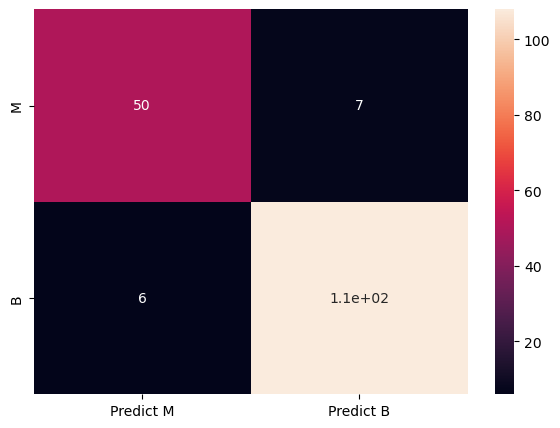

In [24]:
cm = metrics.confusion_matrix(y_test, predict_labels, labels = ["M", "B"])

df_cm = pd.DataFrame(cm, index = [i for i in["M", "B"]],
                    columns = [i for i in["Predict M", "Predict B"]])
plt.figure(figsize = (7, 5));
sns.heatmap(df_cm, annot = True);

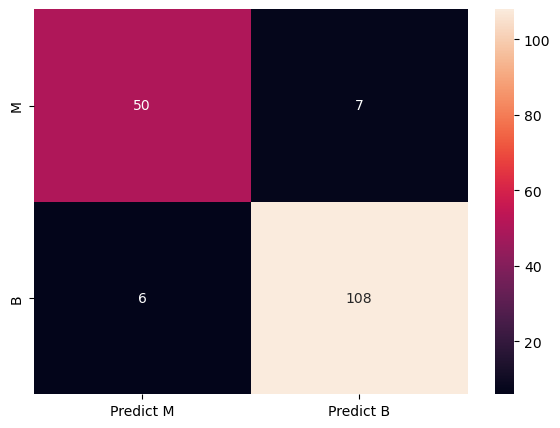

In [25]:
cm = metrics.confusion_matrix(y_test, predict_labels, labels = ["M", "B"])

df_cm = pd.DataFrame(cm, index = [i for i in["M", "B"]],
                    columns = [i for i in["Predict M", "Predict B"]])
plt.figure(figsize = (7, 5));
sns.heatmap(df_cm, annot = True, fmt = "g");